In [ ]:
# Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings("ignore")

DATA COLLECTION

In [ ]:
# Importing the dataset
dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Getting some information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Checking for missing values
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

DATA ANALYSIS

In [ ]:
# Statiscal Measures of the dataset
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
numerical = ['age', 'bmi', 'children']
categorial = ['sex', 'smoker', 'region']
target = ['charges']

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

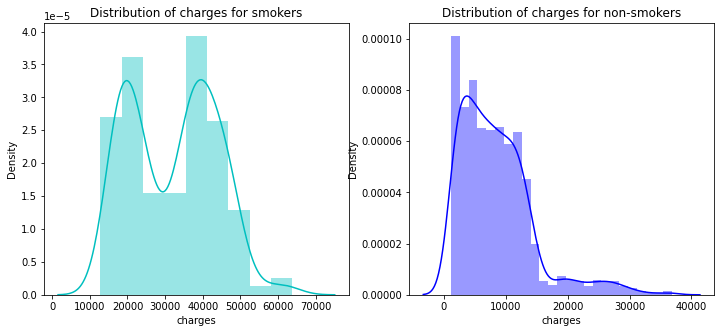

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(dataset[(dataset.smoker == "yes")]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(dataset[(dataset.smoker == "no")]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

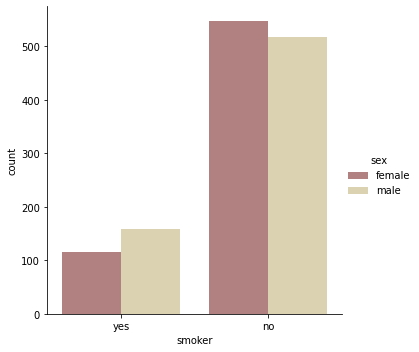

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=dataset)

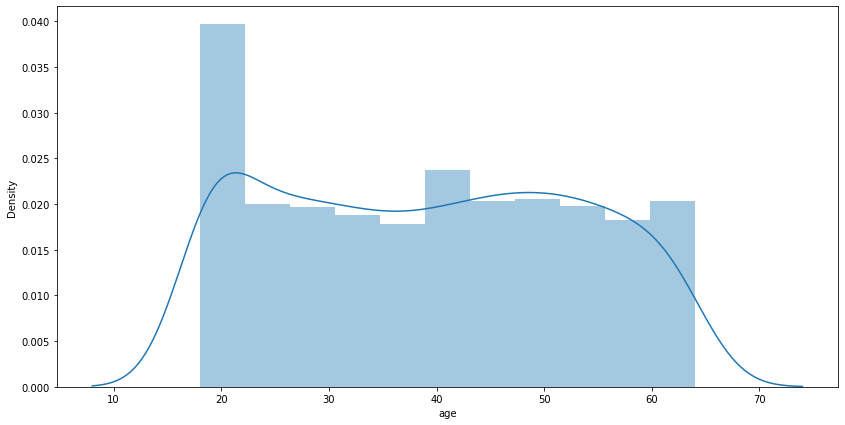

In [ ]:
# Distribution of Age 
plt.figure(figsize=(14,7))
sns.distplot(dataset['age'])

Text(0.5, 1.0, 'The number of smokers and non-smokers (less than  or equal to 20 years old)')

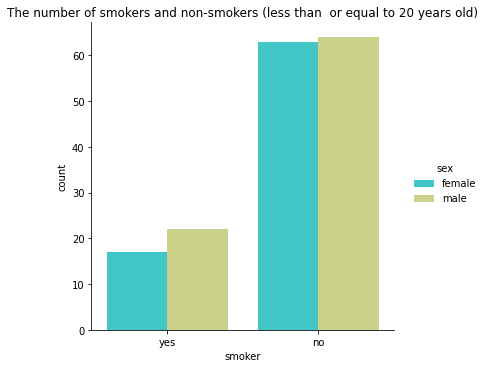

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=dataset[(dataset.age <= 20)])
plt.title("The number of smokers and non-smokers (less than  or equal to 20 years old)")

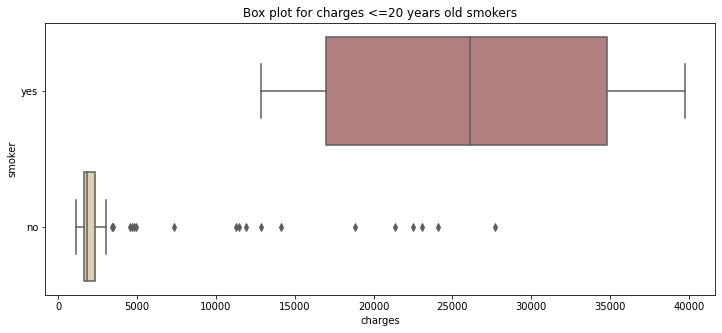

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges <=20 years old smokers")
sns.boxplot(y="smoker", x="charges", data = dataset[(dataset.age <= 20)] , orient="h", palette = 'pink')

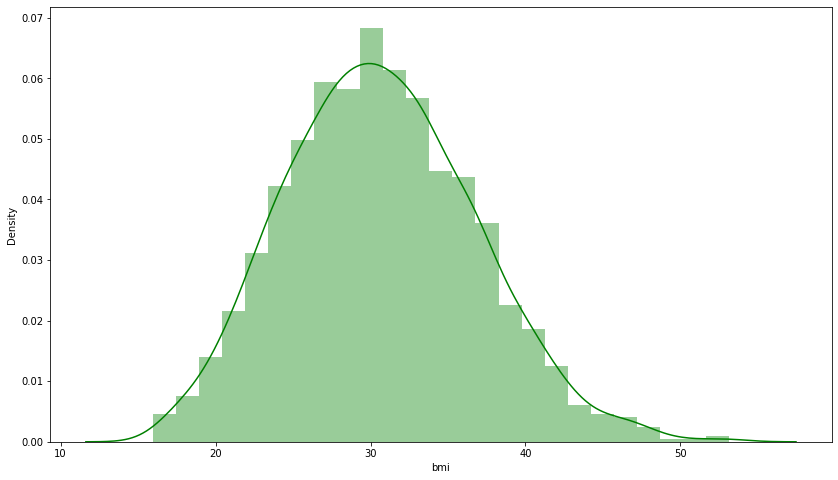

In [ ]:
#BMI distribution
plt.figure(figsize=(14,8))
sns.distplot(dataset['bmi'], color='g')

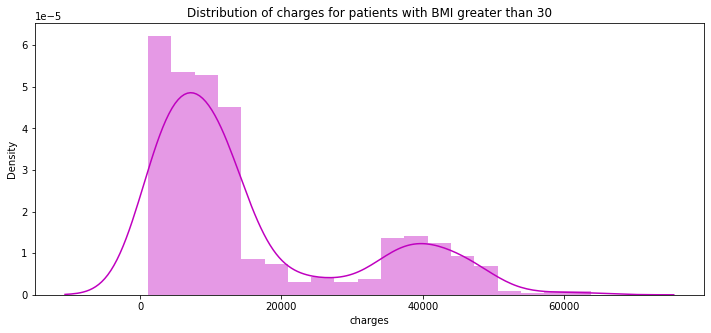

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(dataset[(dataset.bmi >= 30)]['charges'], color = 'm')

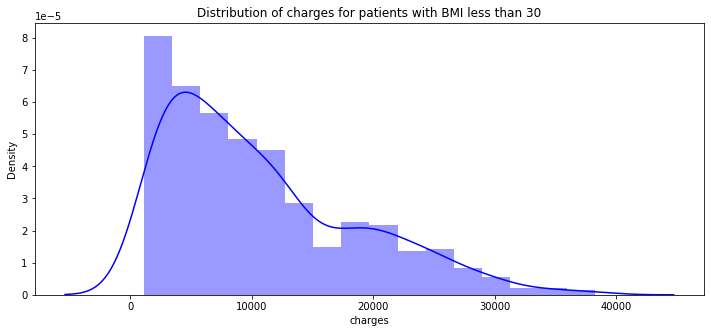

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(dataset[(dataset.bmi < 30)]['charges'], color = 'b')

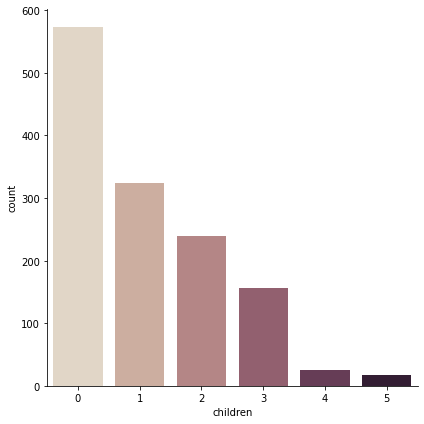

In [ ]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=dataset, size = 6)

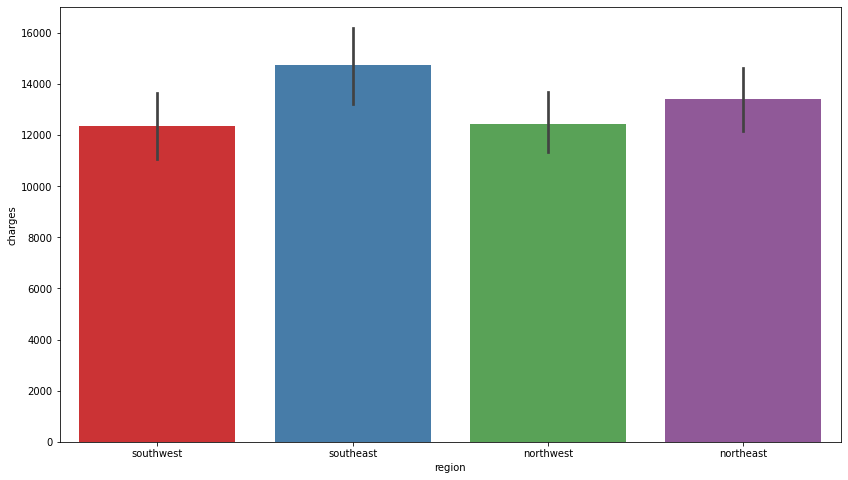

In [ ]:
# distribution of benefactories acc. to region
plt.figure(figsize=(14,8))
sns.barplot(x='region', y='charges', data=dataset, palette='Set1')

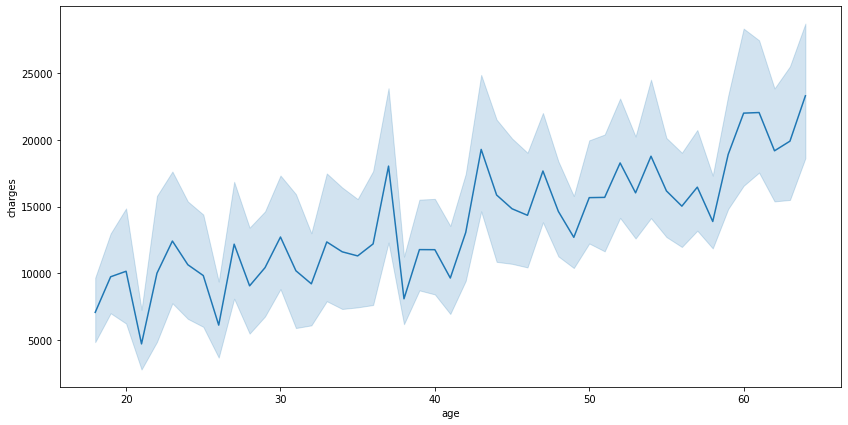

In [ ]:
# Relation of age with charges
plt.figure(figsize=(14,7))
sns.lineplot(x='age', y='charges', data=dataset, palette='Set3')

Text(0.5, 1.0, 'Gender Ratio')

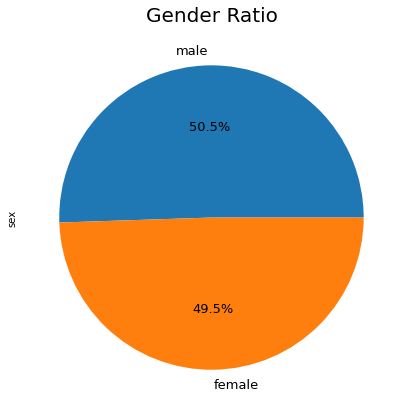

In [ ]:
# Gender Ratio
dataset['sex'].value_counts().plot(kind='pie', 
                                         figsize=(16,7), autopct='%1.1f%%',
                                         explode=(0,0), fontsize=13)
plt.title('Gender Ratio', fontsize=20)

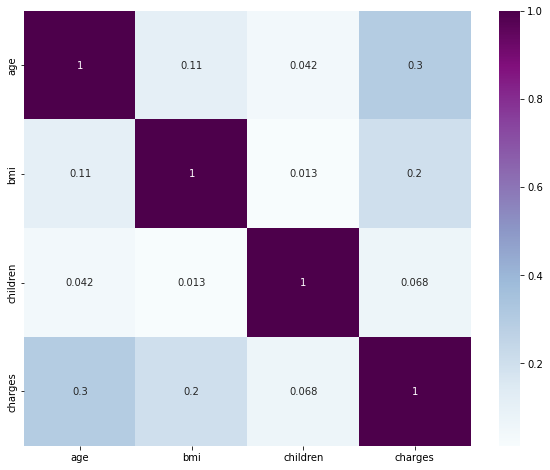

In [ ]:
# Heatmap to check correlation between different variables
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True, cmap='BuPu')

In [ ]:
# Separating the dependent and independent variables
X = dataset.iloc[:, 0:6].values
y = dataset.iloc[:, 6].values

ENCODING CATEGORICAL FEATURES

In [ ]:
# Sex column
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])

# Smoker column
X[:, 4] = labelencoder_X.fit_transform(X[:, 4])

# Region column
ct = ColumnTransformer([("region", OneHotEncoder(), [5])], remainder = 'passthrough')
X = ct.fit_transform(X)
X = X[:, 1:]

In [ ]:
# Splitting the dataset into Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [ ]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

PREDICTION FOR SINGLE TUPLE 
Age : 31 
Sex : Female
BMI : 25.74
Children : 0
Smoker : No
Region : Southwest
Observed Charges : 13763 

In [ ]:
input_data = (0.0, 1.0, 0.0, 31, 0, 25, 0, 0)

# Changing input data to numpy array
num = np.array(input_data)

# Reshape the array
reshaped = num.reshape(1, -1)

prediction = forest_model.predict(reshaped)
print(prediction)

[14825.3845281]


LINEAR REGRESSION MODEL

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Prediction on testing data
testing_data_prediction = regressor.predict(X_test)

# R squared value
r2_test1 = metrics.r2_score(y_test, testing_data_prediction)
print('R-squared value : ',r2_test1)
# Mean Absolute Error
MAE_test1 = mean_absolute_error(y_test, testing_data_prediction)
print('MAE : ', MAE_test1)
# Mean Squared Error
MSE_test1 = mean_squared_error(y_test, testing_data_prediction,squared=False)
print('MSE : ', MSE_test1)

R-squared value :  0.7449415564623687
MAE :  4279.8608342193675
MSE :  6189.092934242135


DECISION TREE REGRESSION MODEL

In [ ]:
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train, y_train)

# Prediction on testing data
testing_data_prediction = decision_regressor.predict(X_test)

# R squared value and Mean absolute error
r2_test2 = metrics.r2_score(y_test, testing_data_prediction)
print('R-squared value : ',r2_test2)
MAE_test2 = mean_absolute_error(y_test, testing_data_prediction)
print('MAE : ',MAE_test2)
# Mean Squared Error
MSE_test2 = mean_squared_error(y_test, testing_data_prediction,squared=False)
print('MSE : ', MSE_test2)

R-squared value :  0.6877889419789665
MAE :  3255.257380817164
MSE :  6847.488191262062


In [ ]:
# Function for the Decision tree regressor with different number of splits
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds_val)
    return(mae)

# Compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [25, 125, 1125]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 25  		 Mean Absolute Error:  2683
Max leaf nodes: 125  		 Mean Absolute Error:  2900
Max leaf nodes: 1125  		 Mean Absolute Error:  3313


RANDOM FOREST REGRESSION MODEL

In [ ]:
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

# Prediction on testing data
forest_pred = forest_model.predict(X_test)

# R squared value and Mean absolute error
r2_test3 = metrics.r2_score(y_test, forest_pred)
print('R-squared value : ',r2_test3)
MAE_test3 = mean_absolute_error(y_test, forest_pred)
print('MAE : ',MAE_test3)
# Mean Squared Error
MSE_test3 = mean_squared_error(y_test, testing_data_prediction,squared=False)
print('MSE : ', MSE_test3)

R-squared value :  0.8359874842106677
MAE :  2736.648761719813
MSE :  6847.488191262062


KNN

In [ ]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Prediction on testing data
knn_pred = knn_model.predict(X_test)

# R squared value and Mean absolute error
r2_test4 = metrics.r2_score(y_test, knn_pred)
print('R-squared value : ',r2_test4)
MAE_test4 = mean_absolute_error(y_test, knn_pred)
print('MAE : ',MAE_test4)
# Mean Squared Error
MSE_test4 = mean_squared_error(y_test, testing_data_prediction,squared=False)
print('MSE : ', MSE_test4)

R-squared value :  0.7767416401535102
MAE :  3394.1474333791048
MSE :  6847.488191262062


In [ ]:
R2_score = [r2_test1, r2_test2, r2_test3, r2_test4]
MAE = [MAE_test1, MAE_test2, MAE_test3, MAE_test4]
RMSE = [MSE_test1, MSE_test2, MSE_test3, MSE_test4]

In [ ]:
col={'R2_score':R2_score}
models=['Linear Regression','Decision Tree','Random Forest','KNN']
df_R2=pd.DataFrame(data=col,index=models)
df_R2

,R2_score
Linear Regression,0.744942
Decision Tree,0.687789
Random Forest,0.835987
KNN,0.776742


In [ ]:
col={'MeanAbsoulteError':MAE,'RootMeanSqaureError':RMSE}
models=['Linear Regression','Decision Tree','Random Forest','KNN']
df_Error=pd.DataFrame(data=col,index=models)
df_Error

,MeanAbsoulteError,RootMeanSqaureError
Linear Regression,4279.860834,6189.092934
Decision Tree,3255.257381,6847.488191
Random Forest,2736.648762,6847.488191
KNN,3394.147433,6847.488191


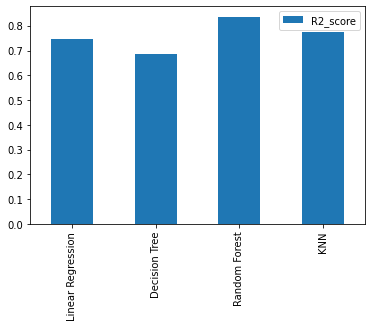

In [ ]:
df_R2.plot(kind='bar')

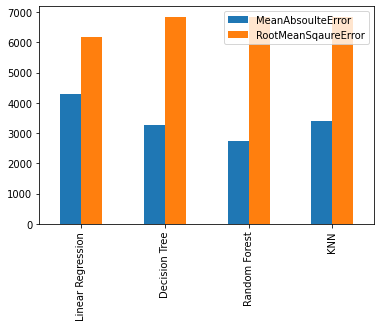

In [ ]:
df_Error.plot(kind='bar')